In [1]:
import os
import json

# Your Kaggle API credentials
kaggle_json = {
    "username": "rahulbastia",
    "key": "c55e4657259bb139400bdca85777ceab"
}

# Create the kaggle folder
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write credentials to kaggle.json
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_json, f)

# Set permissions
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)


In [2]:
!kaggle datasets download -d adityajn105/flickr8k
!unzip flickr8k.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Images/2844963839_ff09cdb81f.jpg  
  inflating: dataset/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: dataset/Images/2845691057_d4ab89d889.jpg  
  inflating: dataset/Images/2845845721_d0bc113ff7.jpg  
  inflating: dataset/Images/2846037553_1a1de50709.jpg  
  inflating: dataset/Images/2846785268_904c5fcf9f.jpg  
  inflating: dataset/Images/2846843520_b0e6211478.jpg  
  inflating: dataset/Images/2847514745_9a35493023.jpg  
  inflating: dataset/Images/2847615962_c330bded6e.jpg  
  inflating: dataset/Images/2847859796_4d9cb0d31f.jpg  
  inflating: dataset/Images/2848266893_9693c66275.jpg  
  inflating: dataset/Images/2848571082_26454cb981.jpg  
  inflating: dataset/Images/2848895544_6d06210e9d.jpg  
  inflating: dataset/Images/2848977044_446a31d86e.jpg  
  inflating: dataset/Images/2849194983_2968c72832.jpg  
  inflating: dataset/Images/2850719435_221f15e951.jpg  
  inflating: dataset/Images/2851198725_37b6027625.jpg

In [3]:
!pip install numpy pandas matplotlib seaborn tensorflow gTTS pillow wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


In [4]:
!nvidia-smi

Sun Aug 24 07:45:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras

# image processing
from tensorflow.keras.applications.inception_v3 import InceptionV3
import string
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# pretraind model components
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image
from tqdm import tqdm

In [6]:
!pip install wordcloud
!pip install gtts
!pip install playsound

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=dafde0fe9f9c1040ac862d5224f0b6666cfdd2f28244f7c55ddf7a460359aef4
  Stored in directory: /root/.cache/pip/wheels/cf/42/ff/7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound


In [7]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
for dirname, _, filenames in os.walk('/content/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/dataset/captions.txt
/content/dataset/Images/3361882891_6e610ffdbb.jpg
/content/dataset/Images/3276895962_c053263d01.jpg
/content/dataset/Images/3091177347_58c85c1c3b.jpg
/content/dataset/Images/2744330402_824240184c.jpg
/content/dataset/Images/3725353555_75c346d7ec.jpg
/content/dataset/Images/1159574340_99ba8c3c59.jpg
/content/dataset/Images/3692746368_ab7d97ab31.jpg
/content/dataset/Images/3715559023_70c41b31c7.jpg
/content/dataset/Images/2695085448_a11833df95.jpg
/content/dataset/Images/3596459539_a47aa80612.jpg
/content/dataset/Images/3700004668_99c3e3f55b.jpg
/content/dataset/Images/3659090958_a56913ca68.jpg
/content/dataset/Images/2204550058_2707d92338.jpg
/content/dataset/Images/2114126343_a0f74ff63b.jpg
/content/dataset/Images/2504991916_dc61e59e49.jpg
/content/dataset/Images/1056359656_662cee0814.jpg
/content/dataset/Images/3309082580_7228067ee0.jpg
/content/dataset/Images/2853407781_c9fea8eef4.jpg
/content/dataset/Images/336460583_6c8ccb7188.jpg
/content/dataset/Imag

In [9]:
images = '/content/dataset/Images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present{} ".format(len(all_imgs)))

The total images present8091 


/tmp/ipython-input-3646157423.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax.imshow(imageio.imread(image), cmap=None)


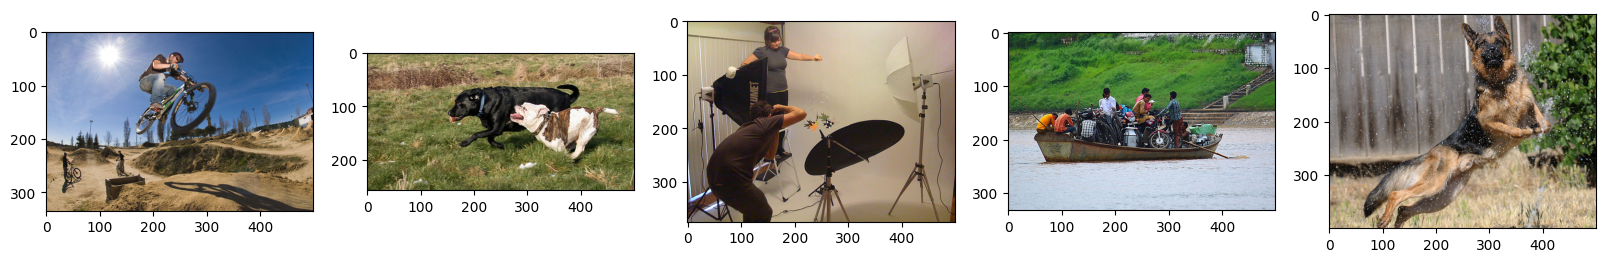

In [10]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

In [11]:
# Import the dataset and read the text file into a separate variable
text_file = '/content/dataset/captions.txt'

def load_doc(filename):

  open_file = open(filename, 'r', encoding = 'latin-1')
  text = open_file.read()
  open_file.close()

  return text

doc = load_doc(text_file)
print(doc[0:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [12]:
img_path = '/content/dataset/Images/'

all_img_id = [] #store all the image id here
all_img_vector = [] #store all the image path here
annotations = [] #store all the captions here

with open('/content/dataset/captions.txt' , 'r') as fo:
  next(fo) #to skip the heading
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions'])

df.head(10)

ID  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   
5  1001773457_577c3a7d70.jpg   
6  1001773457_577c3a7d70.jpg   
7  1001773457_577c3a7d70.jpg   
8  1001773457_577c3a7d70.jpg   
9  1001773457_577c3a7d70.jpg   

                                                Path  \
0  /content/dataset/Images/1000268201_693b08cb0e.jpg   
1  /content/dataset/Images/1000268201_693b08cb0e.jpg   
2  /content/dataset/Images/1000268201_693b08cb0e.jpg   
3  /content/dataset/Images/1000268201_693b08cb0e.jpg   
4  /content/dataset/Images/1000268201_693b08cb0e.jpg   
5  /content/dataset/Images/1001773457_577c3a7d70.jpg   
6  /content/dataset/Images/1001773457_577c3a7d70.jpg   
7  /content/dataset/Images/1001773457_577c3a7d70.jpg   
8  /content/dataset/Images/1001773457_577c3a7d70.jpg   
9  /content/dataset/Images/1001773457_577c3a7d70.jpg   

                                            Captions  
0  A child in a pink dress is climbing up a set o...  
1               A girl going into a wooden building   
2    A little girl climbing into a wooden playhouse   
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
5         A black dog and a spotted dog are fighting  
6  A black dog and a tri-colored dog playing with...  
7  A black dog and a white dog with brown spots a...  
8  Two dogs of different breeds looking at each o...  
9     Two dogs on pavement moving toward each other

In [13]:
#check total captions and images present in dataset

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [14]:
#Create the vocabulary & the counter for the captions
#lower() used to ensure same count irrespective of an alphabet's case

vocabulary = [word.lower() for line in annotations for word in line.split()]

val_count = Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

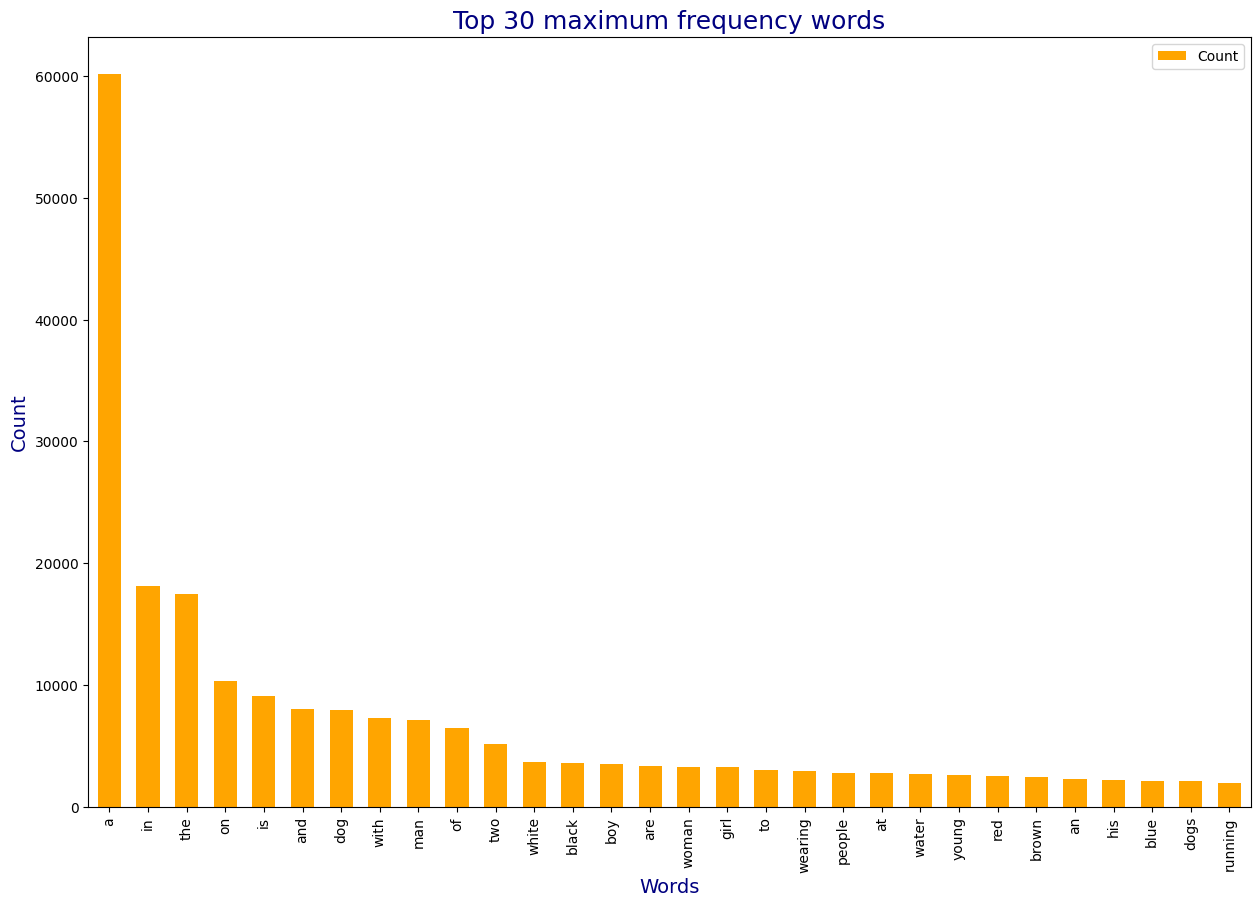

In [15]:
#Visualise the top 30 occuring words in the captions

for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')


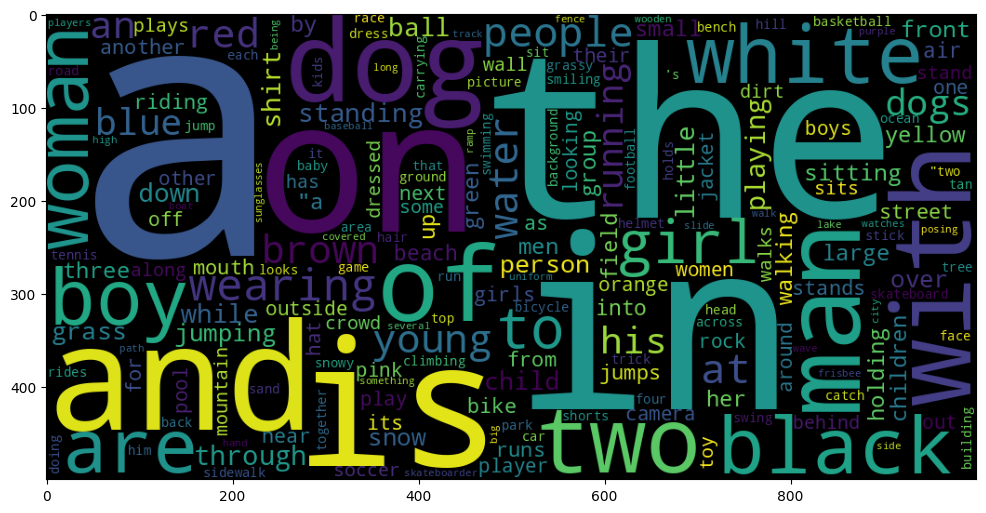

In [16]:
## check out the top 30 stopwords with higher frequency

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

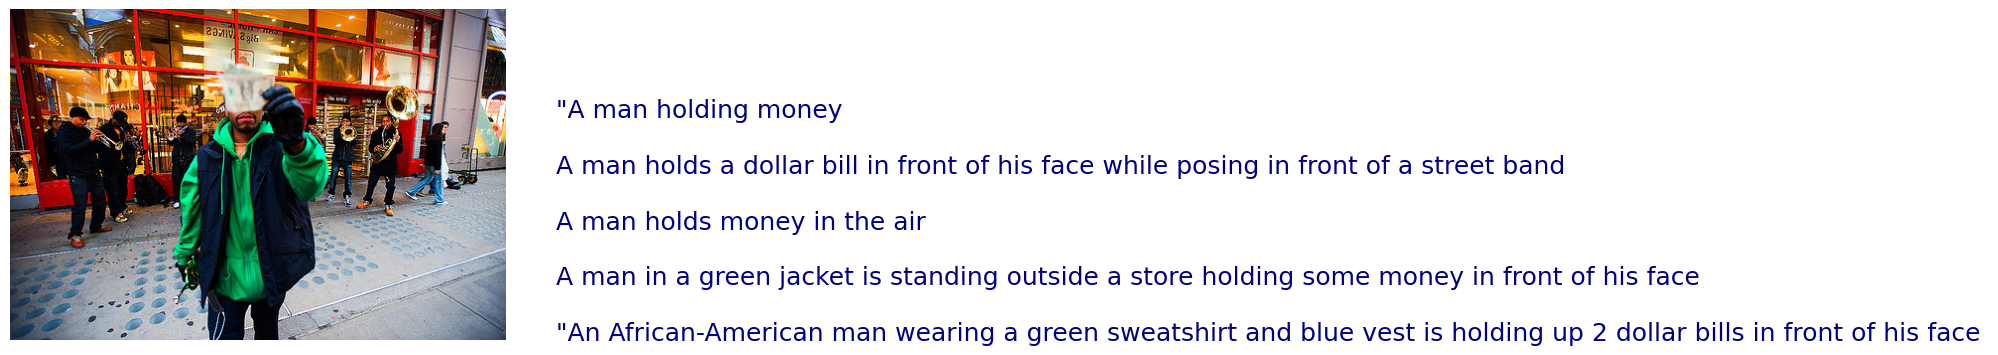

In [17]:
def caption_with_img_plot(image_id, frame) :
  #get the captions
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8049], df)

# Data Cleaning
1. Remove punctuations  
2. Convert captions to lowercase  
3. Retain words and eliminate numeric values

In [18]:
import re

cleaned_annotations = []
for text in annotations:
    text = text.lower()  # lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\b\w\b', '', text)  # remove single letters
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    cleaned_annotations.append(text)

In [19]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector
annotations[0:5]

['<start> A child in a pink dress is climbing up a set of stairs in an entry way  <end>',
 '<start> A girl going into a wooden building  <end>',
 '<start> A little girl climbing into a wooden playhouse  <end>',
 '<start> A little girl climbing the stairs to her playhouse  <end>',
 '<start> A little girl in a pink dress going into a wooden cabin  <end>']

In [20]:
# create the tokenizer
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False,
                      oov_token = 'UNK')

<>:3: SyntaxWarning: invalid escape sequence '\='
<>:3: SyntaxWarning: invalid escape sequence '\='
/tmp/ipython-input-2998317160.py:3: SyntaxWarning: invalid escape sequence '\='
  tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',


In [21]:
# Create word-to-index and index-to-word mappings.
tokenizer.fit_on_texts(annotations)

#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [22]:
# we add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [23]:
tokenizer.index_word

{1: 'UNK',
 2: 'a',
 3: '<start>',
 4: '<end>',
 5: 'in',
 6: 'the',
 7: 'on',
 8: 'is',
 9: 'and',
 10: 'dog',
 11: 'with',
 12: 'man',
 13: 'of',
 14: 'two',
 15: 'white',
 16: 'black',
 17: 'boy',
 18: 'are',
 19: 'woman',
 20: 'girl',
 21: 'to',
 22: 'wearing',
 23: 'people',
 24: 'at',
 25: 'water',
 26: 'young',
 27: 'red',
 28: 'brown',
 29: 'an',
 30: 'his',
 31: 'blue',
 32: 'dogs',
 33: 'running',
 34: 'through',
 35: 'playing',
 36: 'shirt',
 37: 'while',
 38: 'down',
 39: 'little',
 40: 'standing',
 41: 'ball',
 42: 'grass',
 43: 'person',
 44: 'child',
 45: 'snow',
 46: 'jumping',
 47: 'over',
 48: 'three',
 49: 'front',
 50: 'sitting',
 51: 'small',
 52: 'up',
 53: 'field',
 54: 'holding',
 55: 'large',
 56: 'group',
 57: 'by',
 58: 'green',
 59: 'yellow',
 60: 'children',
 61: 'walking',
 62: 'men',
 63: 'her',
 64: 'into',
 65: 'beach',
 66: 'air',
 67: 'near',
 68: 'jumps',
 69: 'mouth',
 70: 'street',
 71: 'runs',
 72: 'for',
 73: 'another',
 74: 'riding',
 75: 'from'

In [24]:
# Create a word count of your tokenizer to visualize the Top 30 occuring words after text processing

tokenizer_top_words = [word for line in annotations for word in line.split() ]
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

Counter({'<start>': 40455,
         'A': 21480,
         'child': 1449,
         'in': 18170,
         'a': 38716,
         'pink': 701,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 1870,
         'entry': 1,
         'way': 48,
         '<end>': 40455,
         'girl': 3174,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1607,
         'playhouse': 6,
         'the': 14587,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3491,
         'dog': 7804,
         'and': 8057,
         'spotted': 36,
         'are': 3364,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7303,
         'each': 399,
         'other': 666,
         'on': 10354,
         'road': 380,
         'white': 3646,
         'brown': 2383,
         

<start> :  40455
<end> :  40455
a :  38716
A :  21480
in :  18170
the :  14587
on :  10354
is :  9069
and :  8057
dog :  7804
with :  7303
man :  6727
of :  6495
Two :  3962
white :  3646
black :  3491
boy :  3395
are :  3364
girl :  3174
woman :  3146
to :  3005
The :  2919
wearing :  2916
at :  2809
water :  2671
red :  2542
young :  2411
people :  2397
brown :  2383
his :  2255


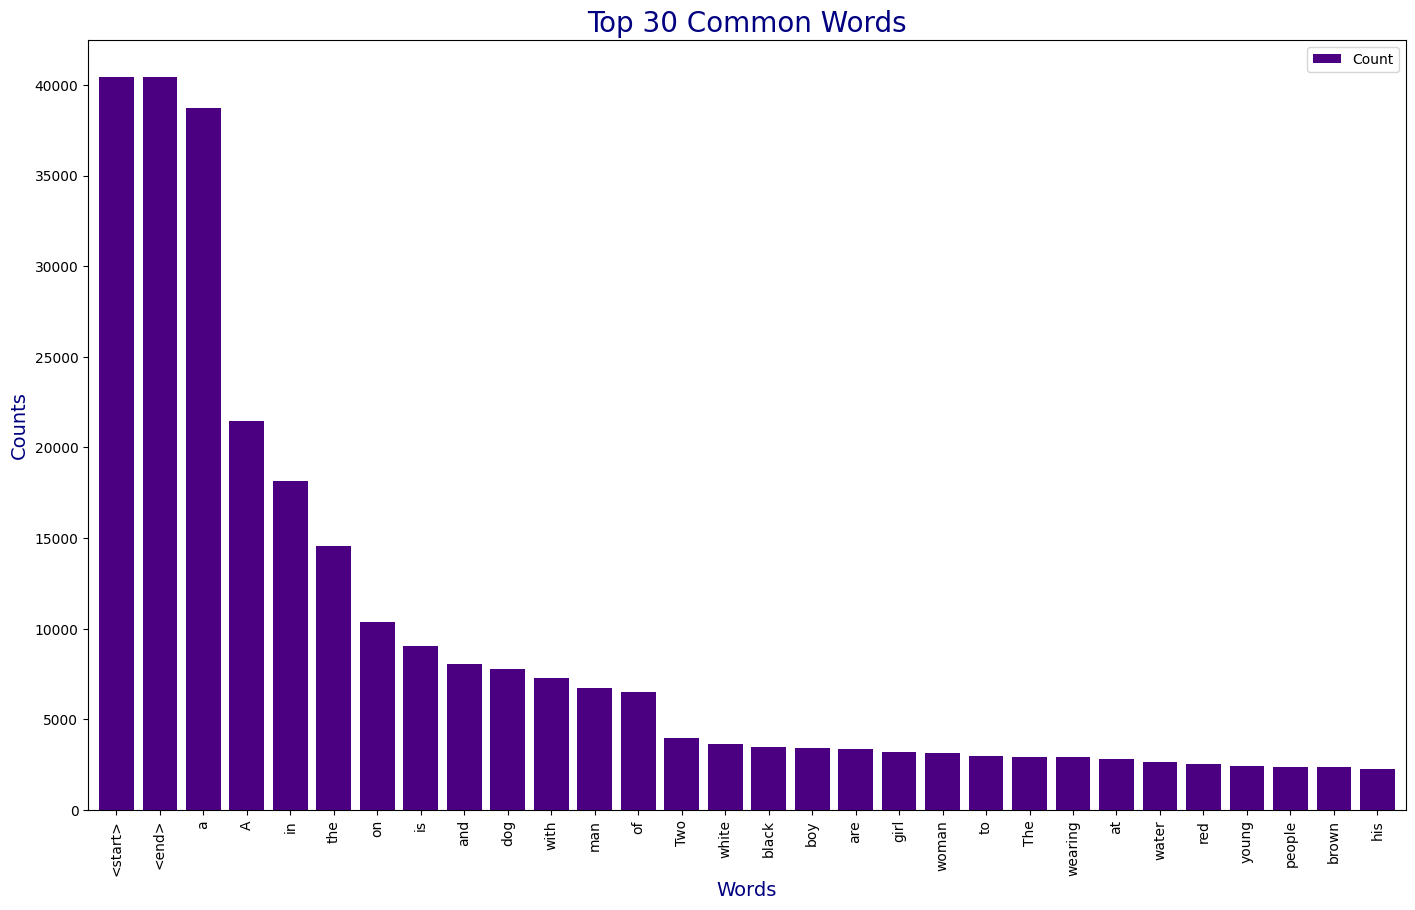

In [25]:
# Loop through the top 30 most common words and print them with their counts
for word, count in tokenizer_top_words_count.most_common(30):
    print(word, ": ", count)

# Get the top 30 most common words and store them as a list of (word, count) tuples
tokens = tokenizer_top_words_count.most_common(30)

# Convert the list of tuples into a Pandas DataFrame with column names 'Word' and 'Count'
most_com_words_df = pd.DataFrame(tokens, columns=['Word', 'Count'])

# Plot the top 30 most common words as a bar chart
most_com_words_df.plot.bar(
    x='Word',           # X-axis will display the words
    y='Count',          # Y-axis will display the count of each word
    width=0.8,          # Width of each bar
    color='indigo',     # Bar color
    figsize=(17, 10)    # Figure size in inches (width, height)
)

# Add title and axis labels with custom font size and color
plt.title('Top 30 Common Words', fontsize=20, color='navy')
plt.xlabel('Words', fontsize=14, color='navy')
plt.ylabel('Counts', fontsize=14, color='navy')

# Disable grid lines for a cleaner look
plt.grid(False)

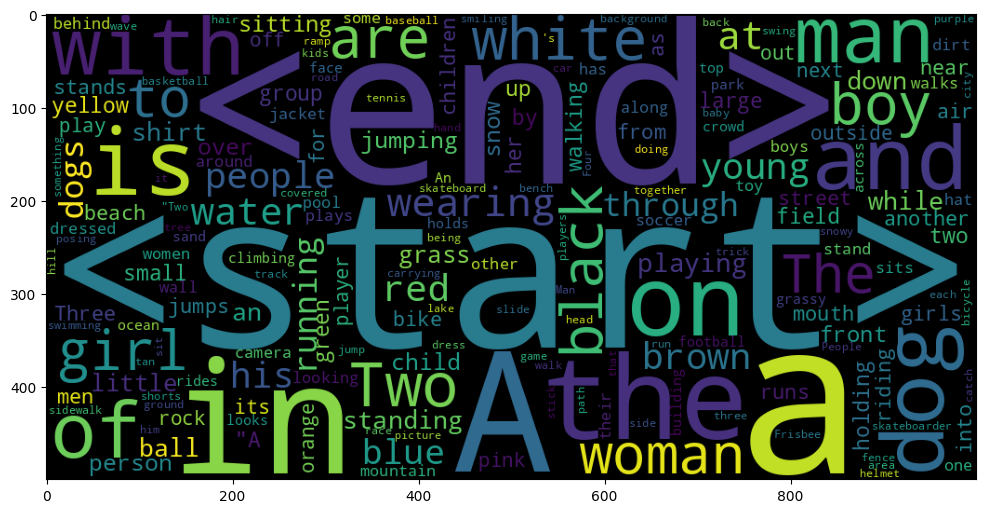

In [26]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(False)

In [27]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

#store the length of all lists
train_seqs_len = [len(seq) for seq in train_seqs]

#store elements from list with maximum value
longest_word_length = max(train_seqs_len)

#calculate longest word_length and pads all sequences to equal length as that of the longest.
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 35)


In [28]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [29]:
#checking image format

tf.keras.backend.image_data_format()

'channels_last'

In [30]:
#write your code here for creating the function. This function should return images & their path

#write your pre-processing steps here (checking only for the first five images here)
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)

    # we need to decode jpeg encoded images (here by default channels = 0)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    #append preprocessed images to the list
    preprocessed_image.append(img)


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


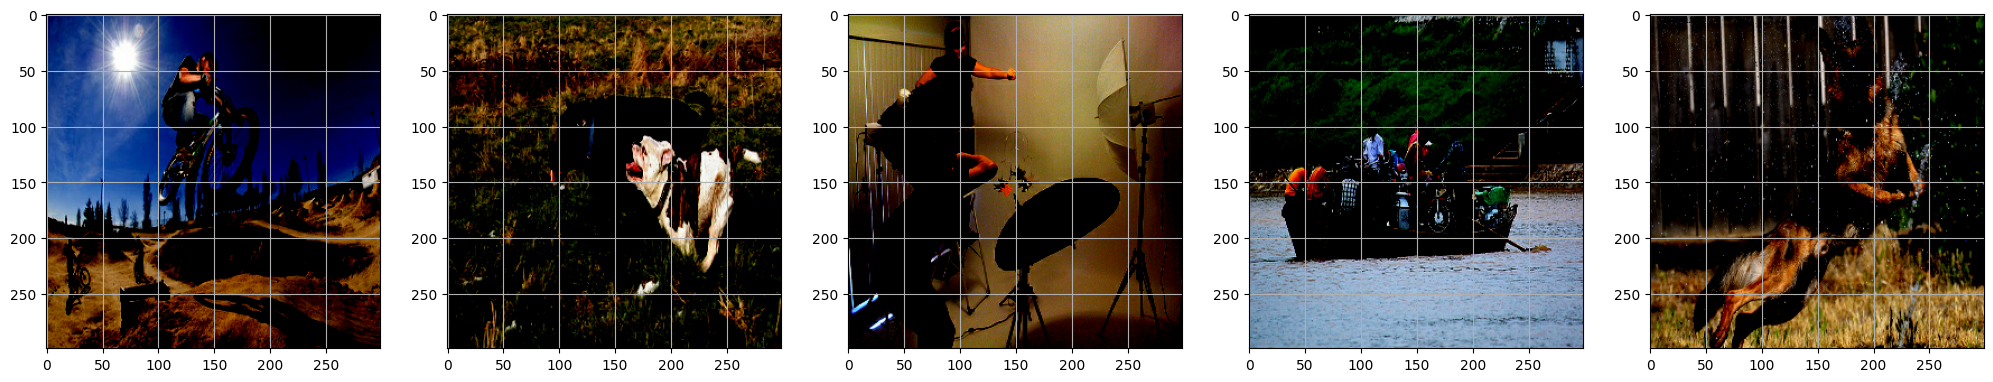

In [31]:
# checking first five images post preprocessing

Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)

for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')


In [32]:
## write your code here for applying the function to the image path dataset,
## such that the transformed dataset should contain images & their path


def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [33]:
all_img_vector

['/content/dataset/Images/1000268201_693b08cb0e.jpg',
 '/content/dataset/Images/1000268201_693b08cb0e.jpg',
 '/content/dataset/Images/1000268201_693b08cb0e.jpg',
 '/content/dataset/Images/1000268201_693b08cb0e.jpg',
 '/content/dataset/Images/1000268201_693b08cb0e.jpg',
 '/content/dataset/Images/1001773457_577c3a7d70.jpg',
 '/content/dataset/Images/1001773457_577c3a7d70.jpg',
 '/content/dataset/Images/1001773457_577c3a7d70.jpg',
 '/content/dataset/Images/1001773457_577c3a7d70.jpg',
 '/content/dataset/Images/1001773457_577c3a7d70.jpg',
 '/content/dataset/Images/1002674143_1b742ab4b8.jpg',
 '/content/dataset/Images/1002674143_1b742ab4b8.jpg',
 '/content/dataset/Images/1002674143_1b742ab4b8.jpg',
 '/content/dataset/Images/1002674143_1b742ab4b8.jpg',
 '/content/dataset/Images/1002674143_1b742ab4b8.jpg',
 '/content/dataset/Images/1003163366_44323f5815.jpg',
 '/content/dataset/Images/1003163366_44323f5815.jpg',
 '/content/dataset/Images/1003163366_44323f5815.jpg',
 '/content/dataset/Images/10

In [34]:
# Map each image full path to the function, in order to preprocess the image

## sort the unique paths and store in a list
training_list = sorted(set(all_img_vector))

#create a new dataset from above training list
New_Img = tf.data.Dataset.from_tensor_slices(training_list)

#map load_images function across the elements of the new dataset above
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
#Note  : Here, num_parallel_calls = tf.data.experimental.AUTOTUNE sets the number of parallel calls dynamically.
            ## based on the current GPU/CPU

#setting a batch size of 64
New_Img = New_Img.batch(64, drop_remainder=False)
#Note : As we don't want to drop the last batch if it contains less than 64 elements, we set drop_remainder to false

In [35]:
New_Img

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [36]:
#Ratio = 80:20 and we will set random state = 42

path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [37]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [38]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet') # removes the final classification layers

new_input = image_model.input # (299, 299, 3) for RGB images
hidden_layer = image_model.layers[-1].output  #write code here to get the output of the image_model

#build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
image_features_extract_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

# feature extraction using a pre-trained model (InceptionV3)

In [40]:
# Dictionary to store extracted features for each image
img_features = {}

# Loop through each image and its corresponding path in the new dataset
# tqdm is used to display a progress bar for the loop
for image, image_path in tqdm(New_Img):

    # Pass the image through the pre-trained InceptionV3 model
    # This gives us the feature maps from the model
    batch_features = image_features_extract_model(image)

    # Reshape the output features into a more usable 2D format
    # batch_features.shape[0] → batch size
    # batch_features.shape[3] → number of channels (depth of feature map)
    # '-1' automatically calculates the flattened spatial dimensions
    batch_features_flattened = tf.reshape(
        batch_features,
        (batch_features.shape[0], -1, batch_features.shape[3])
    )

    # Loop through each feature map and its corresponding image path
    for batch_feat, path in zip(batch_features_flattened, image_path):

        # Convert the image path tensor to a regular Python string
        feature_path = path.numpy().decode('utf-8')

        # Store the flattened feature array in the dictionary
        img_features[feature_path] = batch_feat.numpy()


100%|██████████| 127/127 [01:21<00:00,  1.55it/s]


# We will now feed both, the images as well as  the captions to the model

In [41]:
#to provide, both images along with the captions as input
def map(image_name, caption):

    # your code goes here to create the dataset & transform it

    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [42]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):

    # your code goes here to create the dataset & transform it

    data = tf.data.Dataset.from_tensor_slices((img, capt))
    # dataset created using tf.data.Dataset.from_tensor_slices
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)


    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    # .prefetch() is used to prepare all upcoming elements, while current elements are being processed
    # We set reshuffle_each_iteration set to True in order to ensure different order per epoch
    # Also,  drop_remainder is set to False as we don't want to miss out any element if the last batch contains less than 64 elements

    return data

In [43]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [44]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 35)


In [45]:
# Setting  parameters

embedding_dim = 256
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE  #len(total test images) // BATCH_SIZE

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

In [46]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [47]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation

    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


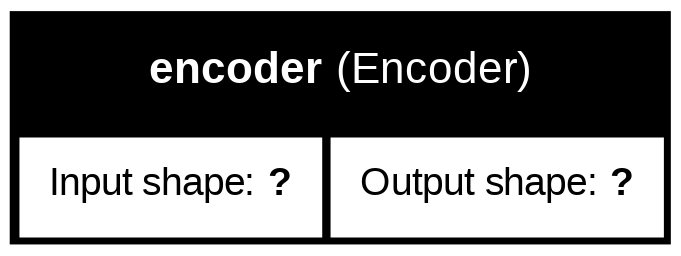

In [48]:
# Encoder with LeakyReLU
class Encoder(tf.keras.Model):
    def __init__(self, embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim)
        self.relu = tf.keras.layers.LeakyReLU(alpha=0.01)

    def call(self, features):
        features = self.dense(features)
        features = self.relu(features)
        return features

# Create encoder
embedding_dim = 256
encoder = Encoder(embedding_dim)

# Build with dummy input
dummy_input = tf.random.uniform((1, 64, 2048))
_ = encoder(dummy_input)   # builds model

# Plot
from tensorflow.keras.utils import plot_model
plot_model(encoder, to_file='encoder.png', show_shapes=True, show_layer_names=True)


In [49]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        # features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)

        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis = hidden[:, tf.newaxis]

        # build your score funciton to shape: (batch_size, 8*8, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

        # extract your attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1)

        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features

        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [50]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units = units
        self.attention = Attention_model(self.units)
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)
        # Simplified GRU configuration - only return sequences
        self.gru = tf.keras.layers.GRU(self.units, return_sequences=True, return_state=False, recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)
        self.d2 = tf.keras.layers.Dense(vocab_size)

    def call(self, x, features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)
        embed = self.embed(x)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)

        # Simple approach - GRU returns only the output sequences
        output = self.gru(embed)

        # Extract the last timestep as the new state
        state = output[:, -1, :]

        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2]))
        output = self.d2(output)

        return output, state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [51]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [52]:
features = encoder(sample_img_batch)
hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights = decoder(dec_input, features, hidden)
print('Feature shape from Encoder:', features.shape)        # (batch, 64, embed_dim)
print('Predictions shape from Decoder:', predictions.shape) # (batch, vocab_size)
print('Attention weights shape:', attention_weights.shape)  # (batch, 64)


Feature shape from Encoder: (64, 64, 256)
Predictions shape from Decoder: (64, 5001)
Attention weights shape: (64, 64, 1)


In [53]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [54]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape

    return tf.reduce_mean(loss_)

In [55]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [56]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [57]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        encoder_op = encoder(img_tensor)

        #apply teacher forcing by passing target word as next input to the decoder
        for r in range(1, target.shape[1]) :
          #pass encoder_op to decoder
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions)
          dec_input = tf.expand_dims(target[:, r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [58]:
@tf.function
def test_step(img_tensor, target):
    loss = 0

    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size = target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)

      #apply teacher forcing again
      for r in range(1, target.shape[1]) :
        #pass encoder_op to decoder
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)

        dec_input = tf.expand_dims(target[: , r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))


    return loss, avg_loss

In [59]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps

    loss_plot.append(avg_train_loss)
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)

    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.320, & test loss is 1.099
Time taken for 1 epoch 178.19449496269226 sec

Test loss has been reduced from 100.000 to 1.099


  7%|▋         | 1/15 [02:58<41:40, 178.58s/it]

For epoch: 2, the train loss is 1.016, & test loss is 0.970
Time taken for 1 epoch 109.24021363258362 sec

Test loss has been reduced from 1.099 to 0.970


 13%|█▎        | 2/15 [04:48<29:52, 137.91s/it]

For epoch: 3, the train loss is 0.921, & test loss is 0.897
Time taken for 1 epoch 108.94087624549866 sec

Test loss has been reduced from 0.970 to 0.897


 20%|██        | 3/15 [06:37<24:57, 124.79s/it]

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()


In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [ ]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (10, 10))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
image_test = path_test.copy()

In [ ]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)


    pred_caption=' '.join(result).rsplit(' ', 1)[0]


    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BELU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)

    # we will make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))

    return test_image



In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.5, 0, 0))
Image.open(test_image)

In [ ]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.5, 0, 0))
Image.open(test_image)

In [ ]:
# Complete code to save and download all necessary files from Google Colab

import pickle
import json
import tensorflow as tf
from google.colab import files
import os

# 1. Save the trained models (add this after your training is complete)
print("Saving models...")

# Build the models with proper input shapes before saving
# This ensures the models are properly initialized
sample_img_batch, sample_cap_batch = next(iter(train_dataset))

# Build encoder
encoder = Encoder(embedding_dim)
_ = encoder(sample_img_batch)  # Build the model
encoder.save("encoder.keras")

# Build attention model
attention_model = Attention_model(units)
features = encoder(sample_img_batch)
hidden = tf.zeros((sample_cap_batch.shape[0], units))
_ = attention_model(features, hidden)  # Build the model
attention_model.save("attention.keras")

# Build decoder
decoder = Decoder(embedding_dim, units, vocab_size)
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)
_ = decoder(dec_input, features, hidden)  # Build the model
decoder.save("decoder.keras")

print("Models saved successfully!")

# 2. Save the image feature extraction model
print("Saving image feature extraction model...")
image_features_extract_model.save("image_features_extract_model.keras")

# 3. Save the tokenizer
print("Saving tokenizer...")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# 4. Save model configuration and parameters
print("Saving model configuration...")
model_config = {
    'embedding_dim': embedding_dim,
    'units': units,
    'vocab_size': vocab_size,
    'max_length': max_length,
    'IMAGE_SHAPE': IMAGE_SHAPE,
    'feature_shape': feature_shape,
    'attention_feature_shape': attention_feature_shape,
    'top_word_cnt': top_word_cnt
}

with open("model_config.json", "w") as f:
    json.dump(model_config, f, indent=2)

# 5. Save word mappings for easy access
print("Saving word mappings...")
word_mappings = {
    'word_index': tokenizer.word_index,
    'index_word': tokenizer.index_word
}

with open("word_mappings.pkl", "wb") as f:
    pickle.dump(word_mappings, f)

# 6. Create requirements.txt file
print("Creating requirements.txt...")
requirements_content = """tensorflow==2.13.0
fastapi==0.104.1
uvicorn==0.24.0
python-multipart==0.0.6
pillow==10.1.0
numpy==1.24.3
python-jose==3.3.0
python-dotenv==1.0.0
"""

with open("requirements.txt", "w") as f:
    f.write(requirements_content)

# 7. Download all files
print("Downloading files...")
files_to_download = [
    "encoder.keras",
    "attention.keras",
    "decoder.keras",
    "image_features_extract_model.keras",
    "tokenizer.pkl",
    "model_config.json",
    "word_mappings.pkl",
    "requirements.txt"
]

for file_name in files_to_download:
    if os.path.exists(file_name):
        print(f"Downloading {file_name}...")
        files.download(file_name)
    else:
        print(f"Warning: {file_name} not found!")

print("All files downloaded successfully!")
print("\nFiles you need for deployment:")
print("1. encoder.keras - The CNN encoder model")
print("2. attention.keras - The attention mechanism model")
print("3. decoder.keras - The RNN decoder model")
print("4. image_features_extract_model.keras - InceptionV3 feature extractor")
print("5. tokenizer.pkl - Text tokenizer for processing captions")
print("6. model_config.json - Model configuration parameters")
print("7. word_mappings.pkl - Word to index mappings")
print("8. requirements.txt - Python dependencies")